## Задание №1
Взять все признаки из датасета с урока. Применить модель Random Forest

<AxesSubplot:>

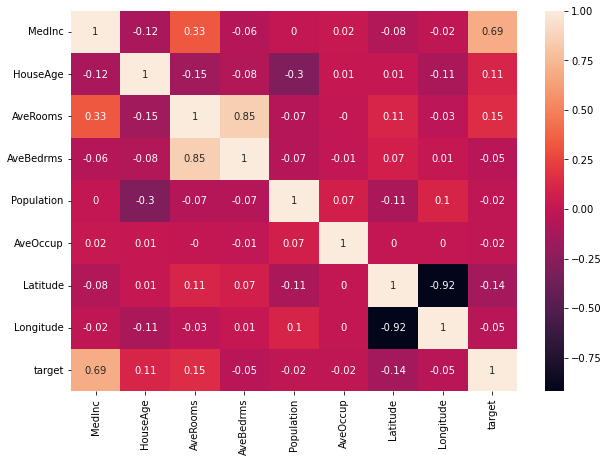

In [39]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
housing = fetch_california_housing()
x = pd.DataFrame(housing.data, columns = housing.feature_names)
y = housing.target
x_corr = x.copy()
x_corr['target'] = y
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
regr = RandomForestRegressor(n_estimators=500)
regr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

## Задание №2
Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке

In [41]:
pred_train = regr.predict(x_train)
pred_test = regr.predict(x_test)
print(f'Средняя абсолютная ошибка (MAE) на обучающей выборке равна: {mean_absolute_error(pred_train, y_train)}')
print(f'Средняя абсолютная ошибка (MAE) на тестовой выборке равна: {mean_absolute_error(pred_test, y_test)}')
print(f'Средняя квадратическая ошибка (MSE) на обучающей выборке равна: {mean_squared_error(pred_train, y_train)}')
print(f'Средняя квадратическая ошибка (MSE) на тестовой выборке равна: {mean_squared_error(pred_test, y_test)}')
print(f'Коэффициент детерминации (R^2) на обучающей выборке равна: {r2_score(pred_train, y_train)}')
print(f'Коэффициент детерминации (R^2) на тестовой выборке равна: {r2_score(pred_test, y_test)}')

Средняя абсолютная ошибка (MAE) на обучающей выборке равна: 0.1209424830850287
Средняя абсолютная ошибка (MAE) на тестовой выборке равна: 0.3219965637306199
Средняя квадратическая ошибка (MSE) на обучающей выборке равна: 0.03464110807139092
Средняя квадратическая ошибка (MSE) на тестовой выборке равна: 0.24494407932812778
Коэффициент детерминации (R^2) на обучающей выборке равна: 0.9703038623513321
Коэффициент детерминации (R^2) на тестовой выборке равна: 0.7552705275595243


## Задание №3
Определить важность признаков

Text(0.5, 1.0, 'RandomForestRegressor')

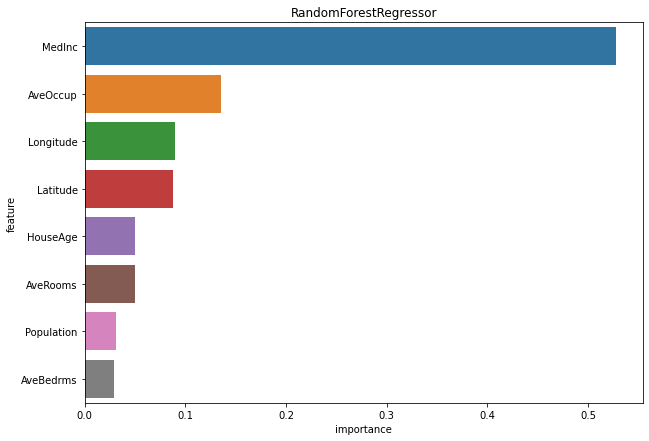

In [42]:
feature_importances = pd.DataFrame({'feature': list(x.columns), 'importance': regr.feature_importances_}).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances['importance'], y=feature_importances['feature'])
plt.title('RandomForestRegressor')